# IoT-sensors
## Detecting Failure:
As with all mechanical equipment, things break and when things break money is lost in the form of repairs and lost oil production. When costs go up cash goes down, but how can we predict when equipment will fail and use this information to drive down our costs?
### Business Understanding
Equipment fail with oil wells can bring various negative impacts to both the company and environment. Thus, detecting failure event is an essential task. Several sensors are used for gathering various information from the equipment in order to detect equipments faliure. With the help of predictive models, equipment failure can be easier to find in a timely manner.
### Data Understanding
A data set has been provided that has documented failure events that occurred on surface equipment and down-hole equipment. For each failure event, data has been collected from over 107 sensors that collect a variety of physical information both on the surface and below the ground. These sensors can be categorized as two types: discrete and histogram(time-based). The goal is to categorize whether or not the given equipment pattern shows the equipment failure. Using this information, how can we minimize costs associated with failures?

Thus, the goal of this dataset is to do a classification task on sensor data such that we predict failures that occur both on the surface and below the ground. This information can be used to send crews out to a well location to fix equipment on the surface or send a workover rig to the well to pull down-hole equipment and address the failure.nd a workover rig to the well to pull down-hole equipment and address the failure.

In [1]:
#importing the required libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
#loading the given training dataset

train_set = pd.read_csv('training_set.csv')

In [3]:
#exploring first few rows of training data

train_set.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
#reading the given test data

test_set = pd.read_csv('test_set.csv')

In [5]:
#exploring first few rows of test data

test_set.head()

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,na,2130706438,332,0,0,0,0,0,...,544762,504820,1597028,631494,5644,5448,11096,1982,0,0
1,2,91122,na,na,na,0,0,0,0,0,...,696774,345742,939332,943744,504048,203698,287374,36566,0,0
2,3,218924,na,na,na,na,na,0,280,119070,...,1032974,866000,1645644,1154924,3549128,1550716,15900,0,na,na
3,4,16,0,30,28,0,0,0,0,0,...,70,24,40,12,56,0,0,0,0,0
4,5,39084,na,1054,1032,0,0,0,0,0,...,276304,123720,225722,281462,295244,256146,241074,2372,0,0


## Exploratory Data Analysis

Text(0, 0.5, 'Number of Records')

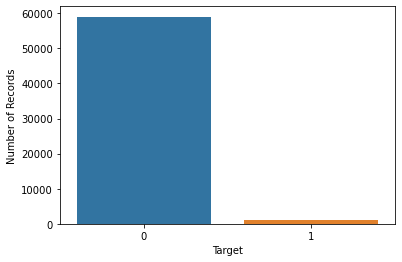

In [6]:
# Counting the occurence of each target value - 0 and 1
g = sns.countplot(x='target', data = train_set)
plt.xlabel('Target')
plt.ylabel('Number of Records')

We have an imabalanced class situation in the train data. The number of observations having downhole failures seems to be quite less. Hence it is important to evaluate the model using the F1 score instead of a common metric like accuracy.

In [7]:
# Concatenating train_set and test_set to clean both the sets together

data = pd.concat(objs=[train_set, test_set], axis=0).reset_index(drop=True)

In [8]:
# Length of training data so that later we can split our training and test data

train_len = len(train_set)

In [9]:
# Replacing string 'na' with NaN values

data = data.replace('na', np.NaN)

In [10]:
# Converting all measures to numerical data type
for col in data.columns:
    if col not in ['id', 'target']:
        data[col] = data[col].astype(np.float)

In [11]:
# Checking for unique values in each column in full dataset

unique_data = data.nunique().reset_index()
unique_data.columns = ['Name','Unique_Count']

In [12]:
# Checking the columns which have less than 2 unique values across the training and test data sets because columns with 
# constant values do not support our model's prediction

unique_data[unique_data.Unique_Count < 2]

,Name,Unique_Count
91,sensor54_measure,1


Here sensor54_measure seems to have a constant value across all observations. Hence it is of no use to our model. We will remove this feature. 

In [13]:
# Checking for null values across each column in dataset

null_df = data.isna().sum().reset_index()
null_df.columns = ['Name', 'Unique_Count']

In [14]:
# sorting the columns having null values

null_df.sort_values('Unique_Count', ascending=False).head(5)

,Name,Unique_Count
80,sensor43_measure,62394
79,sensor42_measure,61704
78,sensor41_measure,60462
77,sensor40_measure,58710
3,sensor2_measure,58693


Here, all columns with more than 75% missing value have been removed.

In [15]:
#Outlier detection - Finding rows with more than two outlier values in columns

def outliers(df, n, features):
    
    outlier_indices = []
    
    for col in features:
        
        #1st quartile
        Q1 = np.percentile(df[col], 25)
        
        #3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        #inter quartile range
        IQR = Q3 - Q1
        
        #identify index of outlier rows
        outlierlist = df[(df[col] < (Q1 - (1.5 * IQR))) | (df[col] > (Q3 + (1.5 * IQR)))].index
        
        outlier_indices.extend(outlierlist)
        
    #selecting rows with more than two outliers
    outlier_indices = Counter(outlier_indices)
    multipleoutliers = list(k for k,v in outlier_indices.items() if v > n)
    
    return multipleoutliers

#detect outliers from Age, SibSp, Fare and Parch
finaloutliers = outliers(data, 2, data.columns)

In [16]:
#outlier detection
data.iloc[finaloutliers]

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure


We do not have any rows having two or more outlier values. Hence we are not removing any observations from our dataset.

In [17]:
# Dropping sensor54_measure as it has constant values + nulls

data.drop(columns=['sensor54_measure'], axis=1, inplace=True)

In [18]:
# Removing columns which mostly have null values - more than 75%

data.drop(columns=['sensor43_measure', 'sensor42_measure', 'sensor41_measure', 'sensor40_measure', 'sensor2_measure', \
                  'sensor39_measure', 'sensor38_measure', 'sensor68_measure'], axis=1, inplace = True)

Since most of the obeservations in each sensor measure is close to 0 and rest of the observations have an extremely high value, imputing missing values using mean would result in incorrect high values. Hence we choose to impute the missing values using the median of each column

In [19]:
# Replacing NaN with median values

for col in data.columns:
    if col not in ['id','target']:
        data[col] = data[col].fillna(data[col].median())

In [20]:
data.isnull().sum().sort_values(ascending=False).head(5)

target                     16001
sensor107_measure              0
sensor25_histogram_bin7        0
sensor26_histogram_bin5        0
sensor26_histogram_bin4        0
dtype: int64

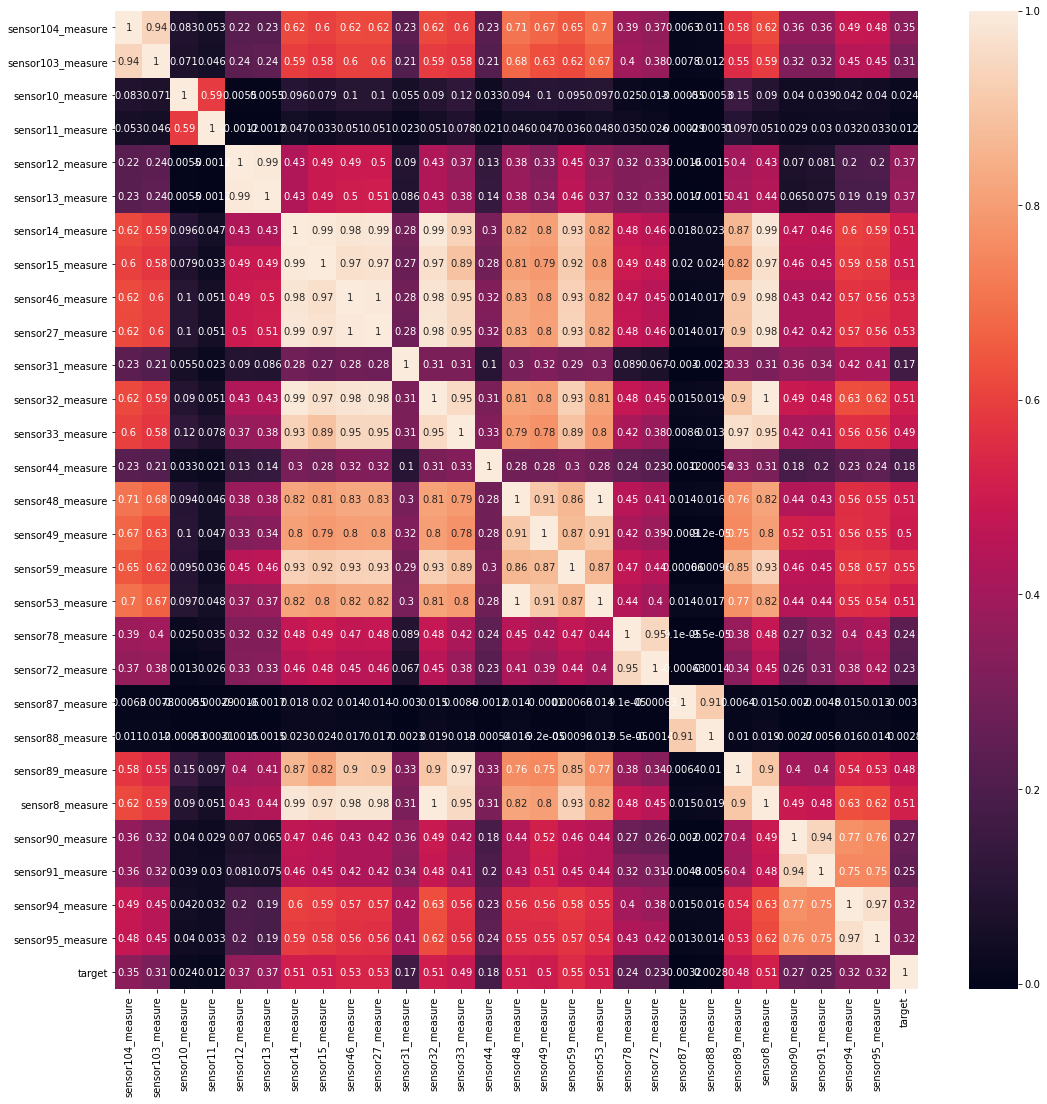

In [21]:
# Correlation matrix between highly correlated varaibles and target value
fig, ax = plt.subplots(figsize = (18, 18))
g = sns.heatmap(data[['sensor104_measure','sensor103_measure','sensor10_measure','sensor11_measure','sensor12_measure','sensor13_measure',
     'sensor14_measure','sensor15_measure','sensor46_measure','sensor27_measure','sensor31_measure',
     'sensor32_measure','sensor33_measure',
      'sensor44_measure','sensor48_measure','sensor49_measure','sensor59_measure',
     'sensor53_measure', 'sensor78_measure', 'sensor72_measure','sensor87_measure','sensor88_measure','sensor89_measure',
     'sensor8_measure', 'sensor90_measure', 'sensor91_measure', 'sensor94_measure', 'sensor95_measure', 'target']].corr(), annot=True, ax=ax)

Since there are multiple features that are highly correlated within themselves and with the target feature as well, we will add a few interaction terms to make the relationship more explicit

In [22]:
data['sensor_1415'] = data['sensor14_measure'] - data['sensor15_measure']
data['sensor_7872'] = data['sensor78_measure'] - data['sensor72_measure']
data['sensor3214'] = data['sensor32_measure'] - data['sensor14_measure']
data['sensor148'] = data['sensor14_measure'] - data['sensor8_measure']
data['sensor4615'] = data['sensor46_measure'] - data['sensor15_measure']
data['sensor815'] = data['sensor15_measure'] - data['sensor8_measure']
data['sensor468'] = data['sensor46_measure'] - data['sensor8_measure']
data['sensor278'] = data['sensor27_measure'] - data['sensor8_measure']
data['sensor8933'] = data['sensor89_measure'] - data['sensor33_measure']
data['sensor9495'] = data['sensor94_measure'] - data['sensor95_measure']
data['sensor1427'] = data['sensor14_measure'] - data['sensor27_measure']

In [23]:
# Dropping sensor32_measure as it mostly duplicates sensor8_measure
data.drop(columns=['sensor32_measure'], axis=1, inplace=True)

In [24]:
data.head()

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor_7872,sensor3214,sensor148,sensor4615,sensor815,sensor468,sensor278,sensor8933,sensor9495,sensor1427
0,1,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1207986.0,-2381600.0,2381600.0,3045048.0,1103470.0,4148518.0,4148518.0,-35236.0,164782.0,-1766918.0
1,2,0.0,33058.0,0.000000e+00,128.0,0.0,0.0,0.0,0.0,0.0,...,556610.0,-1167546.0,1167546.0,1519510.0,733798.0,2253308.0,2253308.0,-15292.0,87076.0,-1085762.0
2,3,0.0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,160520.0,-1137858.0,1137858.0,499704.0,939502.0,1439206.0,1439206.0,-14928.0,55238.0,-301348.0
3,4,0.0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,912.0,-7516.0,7516.0,14060.0,4886.0,18946.0,18946.0,48.0,30.0,-11430.0
4,5,0.0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,149716.0,-1256588.0,1256588.0,1670382.0,644840.0,2315222.0,2315222.0,-41508.0,114320.0,-1058634.0


In [25]:
# Dropping id feature as it does not affect model performance
data.drop(columns=['id'], axis=1, inplace=True)

## Modeling

Below algorithms are being used in our modeling process.

- Random Forest
- Gradient Boosting Decision Trees
- Ada Boost

We will be comparing the performance of the models on our validation set and use the better performing one for our test set predictions. 

In [26]:
# train_set and test_set split
train_set = data[:train_len]
test_set = data[train_len:]

In [27]:
# X and y split
X = train_set.drop(labels=['target'], axis=1)
y = train_set['target']

In [28]:
# Train and val split

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

In [29]:
# RF classifier

rfr = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=4, class_weight={0:1,1:2}, verbose=1)
rfr.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.4s finished


RandomForestClassifier(class_weight={0: 1, 1: 2}, n_jobs=4, random_state=0,
                       verbose=1)

In [30]:
#Predicting validation set results
y_pred = rfr.predict(X_val)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [31]:
#Checking f1 score based on validation set results
from sklearn.metrics import f1_score
f1_score(y_val, y_pred)

0.7812500000000001

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, loss='deviance', verbose=1)

In [33]:
# Fitting with train values and prediciting for validation set
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

      Iter       Train Loss   Remaining Time 
         1           0.0817            3.32m
         2           0.0741            3.30m
         3           0.0690            3.25m
         4           0.0646            3.21m
         5           0.0606            3.18m
         6           0.0569            3.15m
         7           0.0540            3.12m
         8           0.0514            3.08m
         9           0.0485            3.05m
        10           0.0460            3.01m
        20           0.0318            2.67m
        30           0.0251            2.34m
        40           0.0201            2.01m
        50           0.0171            1.68m
        60           0.0156            1.34m
        70           0.0138            1.01m
        80           0.0126           40.20s
        90           0.0116           20.11s
       100           0.0102            0.00s


In [34]:
# Checking f1 score for GBDT model using validation set results
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_gb)

0.776470588235294

In [35]:
# Ada Boost classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [36]:
# Predicting validation set results
y_pred_ada = ada.predict(X_val)

#Checking f1 score
f1_score(y_val, y_pred_ada)

0.6625766871165645

From all three results, we see that Random Forest classifier performs the best on our validation set. Hence we will be using this model to predict our test set results

In [37]:
test_set.drop(columns=['target'], axis=1, inplace=True)

In [38]:
def finalpred(testset):
    finalpred = rfr.predict(testset)
    
    prediction = pd.Series(finalpred, name = 'target')
    test_id = pd.read_csv('test_set.csv')
    submission = pd.concat([test_id['id'], prediction], axis = 1)
    submission['target'] = submission['target'].astype(np.int)
    submission.to_csv('finalpreds.csv', index=False)

In [39]:
finalpred(test_set)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
